# **Sentiment Analysis On Covid Vaccination Tweets**

##       - Prathamesh Rege

**Problem Statement and Implementation of Project** :

The year 2020 has been a disastrous year for the entire world due to the breakout of the Covid-19 pandemic. The disease has spread across multiple nations and has infected over 100k people. The transmission of the disease is direct touch, droplet, and potential aerosol ways. The only way to suppress the same was to bring out an invention of the vaccine. Many research and development centers require a large sample size of infected subjects, to invent and test a vaccine on the same. The three major companies namely, Pfizer, Moderna and Johnson&Johnson have worked hard day and night to bring out a vaccine for the entire world. There are a couple of other companies too, but the top 3 were the ones widely used. We know that Twitter is a social media platform used to portray freedom of speech for all. In this project, we are going to use some of the machine learning models to check the sentiments of tweets based on categorizing them as positive, neutral, and negative by performing an analysis about the covid data.


1) We are using the sentiments (https://www.kaggle.com/datasets/gpreda/all-covid19-vaccines-tweets) dataset.

2) In this dataset, there are 228207 tweets that have been labelled.

3) We perform data preprocessing on this dataset, split the dataset into training (80%) and testing data (20%).

4) We perform some data visualization and infer some insights as to how many are positive and/or negative and/or neutral tweets, getting the frequency of words.

5) We then implement Logistic regression, Random forest classifier, Decision Tree Model, KNN Classifier, Linear SVC Model, AdaBoost Classifier. Also, performed hyperparameter tuning on the models.

6) Further, we select the best algorithm that gives us the maximum accuracy.



# Importing All Necessary Libraries and Packages

In [ ]:
import pandas as pd 
import numpy as np 

import matplotlib.pyplot as plt 
import re
import string

import nltk
from nltk.tokenize import sent_tokenize
from nltk.corpus import words
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.sentiment.util import *
nltk.download('stopwords')
nltk.download('vader_lexicon')

from wordcloud import WordCloud,STOPWORDS, ImageColorGenerator

from collections import Counter

from matplotlib import pyplot as plt
from matplotlib import ticker
import seaborn as sns
import plotly.express as px
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

sns.set(style="darkgrid")

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /usr/share/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


# Importing the Dataset

#### Now we will be importing the dataset from the COVID-19 All Vaccines Tweets.

In [ ]:
path = '../input/all-covid19-vaccines-tweets/vaccination_all_tweets.csv'
covid_vaccine_tweet_data_df = pd.read_csv(path)
covid_vaccine_tweet_data_df

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet
0,1340539111971516416,Rachel Roh,"La Crescenta-Montrose, CA",Aggregator of Asian American news; scanning di...,2009-04-08 17:52:46,405,1692,3247,False,2020-12-20 06:06:44,Same folks said daikon paste could treat a cyt...,['PfizerBioNTech'],Twitter for Android,0,0,False
1,1338158543359250433,Albert Fong,"San Francisco, CA","Marketing dude, tech geek, heavy metal & '80s ...",2009-09-21 15:27:30,834,666,178,False,2020-12-13 16:27:13,While the world has been on the wrong side of ...,NaN,Twitter Web App,1,1,False
2,1337858199140118533,eli🇱🇹🇪🇺👌,Your Bed,"heil, hydra 🖐☺",2020-06-25 23:30:28,10,88,155,False,2020-12-12 20:33:45,#coronavirus #SputnikV #AstraZeneca #PfizerBio...,"['coronavirus', 'SputnikV', 'AstraZeneca', 'Pf...",Twitter for Android,0,0,False
3,1337855739918835717,Charles Adler,"Vancouver, BC - Canada","Hosting ""CharlesAdlerTonight"" Global News Radi...",2008-09-10 11:28:53,49165,3933,21853,True,2020-12-12 20:23:59,"Facts are immutable, Senator, even when you're...",NaN,Twitter Web App,446,2129,False
4,1337854064604966912,Citizen News Channel,NaN,Citizen News Channel bringing you an alternati...,2020-04-23 17:58:42,152,580,1473,False,2020-12-12 20:17:19,Explain to me again why we need a vaccine @Bor...,"['whereareallthesickpeople', 'PfizerBioNTech']",Twitter for iPhone,0,0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
228202,1460170772299665408,VaxBLR,"Bengaluru, India",Hourly updates on FREE and PAID 18+ and 45+ va...,2021-06-21 08:44:34,31,0,0,False,2021-11-15 09:00:15,45+ #URBAN #Bengaluru #CovidVaccine Availabili...,"['URBAN', 'Bengaluru', 'CovidVaccine', 'COVISH...",VaxBlr,0,0,False
228203,1460163268262051841,VaxBLR,"Bengaluru, India",Hourly updates on FREE and PAID 18+ and 45+ va...,2021-06-21 08:44:34,31,0,0,False,2021-11-15 08:30:26,18-44 #BBMP #Bengaluru #CovidVaccine Availabil...,"['BBMP', 'Bengaluru', 'CovidVaccine', 'COVISHI...",VaxBlr,0,1,False
228204,1460163224221851655,VaxBLR,"Bengaluru, India",Hourly updates on FREE and PAID 18+ and 45+ va...,2021-06-21 08:44:34,31,0,0,False,2021-11-15 08:30:15,18-44 #URBAN #Bengaluru #CovidVaccine Availabi...,"['URBAN', 'Bengaluru', 'CovidVaccine', 'COVISH...",VaxBlr,0,0,False
228205,1460156376995573765,Gatti Valentino🐾,Southern Africa,"Entrepreneur, self taught cook🍲🌮 @Chelsea @Fer...",2019-08-28 10:31:43,8103,3113,45726,False,2021-11-15 08:03:03,They promote their Vaccines leaving out the st...,['SputnikV'],Twitter for Android,0,0,False


In [ ]:
covid_vaccine_tweet_data_df.head()

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet
0,1340539111971516416,Rachel Roh,"La Crescenta-Montrose, CA",Aggregator of Asian American news; scanning di...,2009-04-08 17:52:46,405,1692,3247,False,2020-12-20 06:06:44,Same folks said daikon paste could treat a cyt...,['PfizerBioNTech'],Twitter for Android,0,0,False
1,1338158543359250433,Albert Fong,"San Francisco, CA","Marketing dude, tech geek, heavy metal & '80s ...",2009-09-21 15:27:30,834,666,178,False,2020-12-13 16:27:13,While the world has been on the wrong side of ...,NaN,Twitter Web App,1,1,False
2,1337858199140118533,eli🇱🇹🇪🇺👌,Your Bed,"heil, hydra 🖐☺",2020-06-25 23:30:28,10,88,155,False,2020-12-12 20:33:45,#coronavirus #SputnikV #AstraZeneca #PfizerBio...,"['coronavirus', 'SputnikV', 'AstraZeneca', 'Pf...",Twitter for Android,0,0,False
3,1337855739918835717,Charles Adler,"Vancouver, BC - Canada","Hosting ""CharlesAdlerTonight"" Global News Radi...",2008-09-10 11:28:53,49165,3933,21853,True,2020-12-12 20:23:59,"Facts are immutable, Senator, even when you're...",NaN,Twitter Web App,446,2129,False
4,1337854064604966912,Citizen News Channel,NaN,Citizen News Channel bringing you an alternati...,2020-04-23 17:58:42,152,580,1473,False,2020-12-12 20:17:19,Explain to me again why we need a vaccine @Bor...,"['whereareallthesickpeople', 'PfizerBioNTech']",Twitter for iPhone,0,0,False


#### Now that we have imported the dataset, we will check the shape of our dataset, to view the number of rows and column.

In [ ]:
covid_vaccine_tweet_data_df.shape

(228207, 16)

#### We can see that our dataset has 228,207 rows and 16 columns.

In [ ]:
covid_vaccine_tweet_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 228207 entries, 0 to 228206
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   id                228207 non-null  int64 
 1   user_name         228205 non-null  object
 2   user_location     161296 non-null  object
 3   user_description  211189 non-null  object
 4   user_created      228207 non-null  object
 5   user_followers    228207 non-null  int64 
 6   user_friends      228207 non-null  int64 
 7   user_favourites   228207 non-null  int64 
 8   user_verified     228207 non-null  bool  
 9   date              228207 non-null  object
 10  text              228207 non-null  object
 11  hashtags          178504 non-null  object
 12  source            228088 non-null  object
 13  retweets          228207 non-null  int64 
 14  favorites         228207 non-null  int64 
 15  is_retweet        228207 non-null  bool  
dtypes: bool(2), int64(6), object(8)
memory

#### We check the data types of each attribute

In [ ]:
covid_vaccine_tweet_data_df.describe()

,id,user_followers,user_friends,user_favourites,retweets,favorites
count,2.282070e+05,2.282070e+05,228207.000000,2.282070e+05,228207.000000,228207.000000
mean,1.407541e+18,9.605393e+04,986.736204,1.210417e+04,2.489284,10.819020
std,2.908485e+16,8.389053e+05,5293.500468,3.908233e+04,51.079821,199.527693
min,1.337728e+18,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000
25%,1.381940e+18,5.500000e+01,27.000000,5.700000e+01,0.000000,0.000000
50%,1.408133e+18,3.280000e+02,229.000000,9.960000e+02,0.000000,0.000000
75%,1.428688e+18,1.521000e+03,794.000000,7.300000e+03,1.000000,2.000000
max,1.463251e+18,1.635305e+07,582461.000000,1.299600e+06,12294.000000,54017.000000


#### Visualizing Data distribution by country

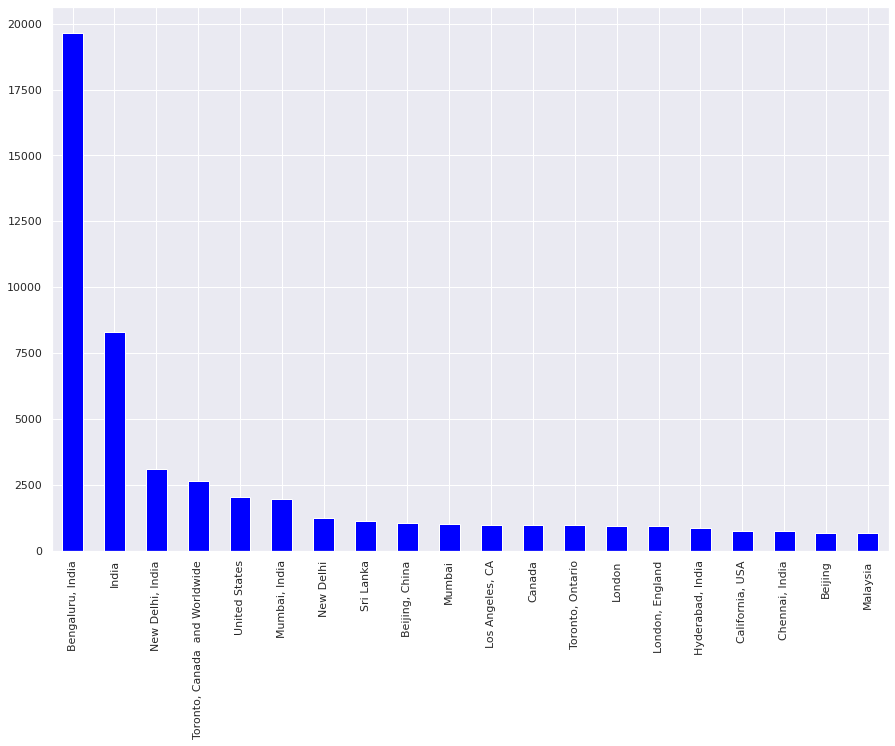

In [ ]:
plt.figure(figsize=(15,10))
location_serie = covid_vaccine_tweet_data_df['user_location']
location_serie = location_serie.value_counts(dropna=True).nlargest(20)
location_serie.plot(kind ='bar', color='blue')
plt.show()

# Data Cleaning

In [ ]:
#deleting all unnecessary columns before starting the cleaning process
covid_vaccine_tweet_data_df.drop(covid_vaccine_tweet_data_df.columns.difference(['user_name', 'date','text']), axis=1, inplace=True)
covid_vaccine_tweet_data_df.head()

,user_name,date,text
0,Rachel Roh,2020-12-20 06:06:44,Same folks said daikon paste could treat a cyt...
1,Albert Fong,2020-12-13 16:27:13,While the world has been on the wrong side of ...
2,eli🇱🇹🇪🇺👌,2020-12-12 20:33:45,#coronavirus #SputnikV #AstraZeneca #PfizerBio...
3,Charles Adler,2020-12-12 20:23:59,"Facts are immutable, Senator, even when you're..."
4,Citizen News Channel,2020-12-12 20:17:19,Explain to me again why we need a vaccine @Bor...


In [ ]:
covid_vaccine_tweet_data_df['date'][0]

'2020-12-20 06:06:44'

#### For the date column, we can see that it is specific to the second of the tweet. Since we wouldn't need such an accurate data for our analysis, we will only take the day, month, and year of the tweet.

In [ ]:
#normalizing date format
covid_vaccine_tweet_data_df['date'] = pd.to_datetime(covid_vaccine_tweet_data_df['date']).dt.date

In [ ]:
#deleting repeated tweets
covid_vaccine_tweet_data_df = covid_vaccine_tweet_data_df.drop_duplicates(subset='text')
covid_vaccine_tweet_data_df.head()

,user_name,date,text
0,Rachel Roh,2020-12-20,Same folks said daikon paste could treat a cyt...
1,Albert Fong,2020-12-13,While the world has been on the wrong side of ...
2,eli🇱🇹🇪🇺👌,2020-12-12,#coronavirus #SputnikV #AstraZeneca #PfizerBio...
3,Charles Adler,2020-12-12,"Facts are immutable, Senator, even when you're..."
4,Citizen News Channel,2020-12-12,Explain to me again why we need a vaccine @Bor...


#### This is used to check if our data has any null values.

In [ ]:
covid_vaccine_tweet_data_df.isna().sum()

user_name    2
date         0
text         0
dtype: int64

# Data Processing

#### To remove the links from text attribute, we have defined the following function with the help of 'Regex'.

In [ ]:
# URL Removal
covid_vaccine_tweet_data_df["text"] = covid_vaccine_tweet_data_df["text"].apply(lambda x:re.sub(r'https?://\S+', '', str(x)))
covid_vaccine_tweet_data_df["text"]

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


0         Same folks said daikon paste could treat a cyt...
1         While the world has been on the wrong side of ...
2         #coronavirus #SputnikV #AstraZeneca #PfizerBio...
3         Facts are immutable, Senator, even when you're...
4         Explain to me again why we need a vaccine @Bor...
                                ...                        
228202    45+ #URBAN #Bengaluru #CovidVaccine Availabili...
228203    18-44 #BBMP #Bengaluru #CovidVaccine Availabil...
228204    18-44 #URBAN #Bengaluru #CovidVaccine Availabi...
228205    They promote their Vaccines leaving out the st...
228206    45+ #URBAN #Bengaluru #CovidVaccine Availabili...
Name: text, Length: 226373, dtype: object

In [ ]:
# Lowercase removal
covid_vaccine_tweet_data_df['text'] = covid_vaccine_tweet_data_df['text'].apply(lambda x: " ".join(x.lower() for x in x.split()))

covid_vaccine_tweet_data_df['text']


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


0         same folks said daikon paste could treat a cyt...
1         while the world has been on the wrong side of ...
2         #coronavirus #sputnikv #astrazeneca #pfizerbio...
3         facts are immutable, senator, even when you're...
4         explain to me again why we need a vaccine @bor...
                                ...                        
228202    45+ #urban #bengaluru #covidvaccine availabili...
228203    18-44 #bbmp #bengaluru #covidvaccine availabil...
228204    18-44 #urban #bengaluru #covidvaccine availabi...
228205    they promote their vaccines leaving out the st...
228206    45+ #urban #bengaluru #covidvaccine availabili...
Name: text, Length: 226373, dtype: object

In [ ]:
# Punctuation Removal

covid_vaccine_tweet_data_df['text'] = covid_vaccine_tweet_data_df['text'].str.replace('[^\w\s]','')
covid_vaccine_tweet_data_df.head()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,user_name,date,text
0,Rachel Roh,2020-12-20,same folks said daikon paste could treat a cyt...
1,Albert Fong,2020-12-13,while the world has been on the wrong side of ...
2,eli🇱🇹🇪🇺👌,2020-12-12,coronavirus sputnikv astrazeneca pfizerbiontec...
3,Charles Adler,2020-12-12,facts are immutable senator even when youre no...
4,Citizen News Channel,2020-12-12,explain to me again why we need a vaccine bori...


In [ ]:
!pip install emot
import emot
from emot.emo_unicode import UNICODE_EMOJI
emojis = list(UNICODE_EMOJI.keys())

from nltk.corpus import stopwords
stopwords_en = stopwords.words('english')

import re

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.5/61.5 kB 216.1 kB/s eta 0:00:00a 0:00:01


In [ ]:
# Emoji Removal
def remove_emoji(string):
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               u"\U00002500-\U00002BEF"  # chinese char
                               u"\U00002702-\U000027B0"
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               u"\U0001f926-\U0001f937"
                               u"\U00010000-\U0010ffff"
                               u"\u2640-\u2642"
                               u"\u2600-\u2B55"
                               u"\u200d"
                               u"\u23cf"
                               u"\u23e9"
                               u"\u231a"
                               u"\ufe0f"  # dingbats
                               u"\u3030"
                               "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', string)
covid_vaccine_tweet_data_df["text"] = covid_vaccine_tweet_data_df["text"].apply(str)
covid_vaccine_tweet_data_df["text"] = covid_vaccine_tweet_data_df["text"].apply(remove_emoji)
covid_vaccine_tweet_data_df["text"]

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


0         same folks said daikon paste could treat a cyt...
1         while the world has been on the wrong side of ...
2         coronavirus sputnikv astrazeneca pfizerbiontec...
3         facts are immutable senator even when youre no...
4         explain to me again why we need a vaccine bori...
                                ...                        
228202    45 urban bengaluru covidvaccine availability f...
228203    1844 bbmp bengaluru covidvaccine availability ...
228204    1844 urban bengaluru covidvaccine availability...
228205    they promote their vaccines leaving out the st...
228206    45 urban bengaluru covidvaccine availability f...
Name: text, Length: 226373, dtype: object

In [ ]:
# Single character and double space removal
covid_vaccine_tweet_data_df["text"] = covid_vaccine_tweet_data_df["text"].apply(lambda x:re.sub(r'\s+[a-zA-Z]\s+', '', x))
covid_vaccine_tweet_data_df["text"] = covid_vaccine_tweet_data_df["text"].apply(lambda x:re.sub(r'\s+', ' ', x, flags=re.I))
covid_vaccine_tweet_data_df["text"]

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


0         same folks said daikon paste could treatcytoki...
1         while the world has been on the wrong side of ...
2         coronavirus sputnikv astrazeneca pfizerbiontec...
3         facts are immutable senator even when youre no...
4         explain to me again why we needvaccine borisjo...
                                ...                        
228202    45 urban bengaluru covidvaccine availability f...
228203    1844 bbmp bengaluru covidvaccine availability ...
228204    1844 urban bengaluru covidvaccine availability...
228205    they promote their vaccines leaving out the st...
228206    45 urban bengaluru covidvaccine availability f...
Name: text, Length: 226373, dtype: object

In [ ]:
# Stopword Removal
", ".join(stopwords.words('english'))
STOPWORDS = set(stopwords.words('english'))
def remove_stopwords(text):
    """custom function to remove the stopwords"""
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])

covid_vaccine_tweet_data_df["Text_stop"] = covid_vaccine_tweet_data_df["text"].apply(lambda text: remove_stopwords(text))
covid_vaccine_tweet_data_df["Text_stop"]


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


0         folks said daikon paste could treatcytokine st...
1         world wrong side history year hopefully bigges...
2         coronavirus sputnikv astrazeneca pfizerbiontec...
3         facts immutable senator even youre ethically s...
4         explain needvaccine borisjohnson matthancock w...
                                ...                        
228202    45 urban bengaluru covidvaccine availability 1...
228203    1844 bbmp bengaluru covidvaccine availability ...
228204    1844 urban bengaluru covidvaccine availability...
228205    promote vaccines leaving stronger russia vacci...
228206    45 urban bengaluru covidvaccine availability 1...
Name: Text_stop, Length: 226373, dtype: object

In [ ]:
# Most common words
from collections import Counter
cnt = Counter()
for text in covid_vaccine_tweet_data_df["Text_stop"].values:
    for word in text.split():
        cnt[word] += 1
        
cnt.most_common(10)

[('covaxin', 73393),
 ('vaccine', 53020),
 ('moderna', 48664),
 ('slots', 34019),
 ('dose', 32400),
 ('covid19', 30010),
 ('age', 23967),
 ('18', 20979),
 ('pfizer', 15148),
 ('vaccines', 14495)]

In [ ]:
word_counts = cnt.most_common(10)
words_df = pd.DataFrame(word_counts)
words_df.columns = ['word', 'freq']

px.bar(words_df, x='word', y='freq', title='Most Common Words')

# Feature Engineering

In [ ]:
#Number of Words
covid_vaccine_tweet_data_df['Number_Of_Words'] = covid_vaccine_tweet_data_df['text'].apply(lambda x:len(x.split(' ')))
#Average Word Length
covid_vaccine_tweet_data_df['Mean_Word_Length'] = covid_vaccine_tweet_data_df['text'].apply(lambda x:np.round(np.mean([len(w) for w in x.split(' ')]),2) )
covid_vaccine_tweet_data_df.head()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,user_name,date,text,Text_stop,Number_Of_Words,Mean_Word_Length
0,Rachel Roh,2020-12-20,same folks said daikon paste could treatcytoki...,folks said daikon paste could treatcytokine st...,9,6.78
1,Albert Fong,2020-12-13,while the world has been on the wrong side of ...,world wrong side history year hopefully bigges...,20,4.65
2,eli🇱🇹🇪🇺👌,2020-12-12,coronavirus sputnikv astrazeneca pfizerbiontec...,coronavirus sputnikv astrazeneca pfizerbiontec...,14,6.79
3,Charles Adler,2020-12-12,facts are immutable senator even when youre no...,facts immutable senator even youre ethically s...,19,4.79
4,Citizen News Channel,2020-12-12,explain to me again why we needvaccine borisjo...,explain needvaccine borisjohnson matthancock w...,11,8.45


#### The text is tokenised, i.e., the sentences are split into comma seperated words and saved them in the list form.

In [ ]:
import textblob           
from textblob import TextBlob

def tokenization(text):
    text = re.split('\W+', text)
    return text

covid_vaccine_tweet_data_df['Text_tokenized'] = covid_vaccine_tweet_data_df['Text_stop'].apply(lambda x: tokenization(x.lower()))
covid_vaccine_tweet_data_df.head()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,user_name,date,text,Text_stop,Number_Of_Words,Mean_Word_Length,Text_tokenized
0,Rachel Roh,2020-12-20,same folks said daikon paste could treatcytoki...,folks said daikon paste could treatcytokine st...,9,6.78,"[folks, said, daikon, paste, could, treatcytok..."
1,Albert Fong,2020-12-13,while the world has been on the wrong side of ...,world wrong side history year hopefully bigges...,20,4.65,"[world, wrong, side, history, year, hopefully,..."
2,eli🇱🇹🇪🇺👌,2020-12-12,coronavirus sputnikv astrazeneca pfizerbiontec...,coronavirus sputnikv astrazeneca pfizerbiontec...,14,6.79,"[coronavirus, sputnikv, astrazeneca, pfizerbio..."
3,Charles Adler,2020-12-12,facts are immutable senator even when youre no...,facts immutable senator even youre ethically s...,19,4.79,"[facts, immutable, senator, even, youre, ethic..."
4,Citizen News Channel,2020-12-12,explain to me again why we needvaccine borisjo...,explain needvaccine borisjohnson matthancock w...,11,8.45,"[explain, needvaccine, borisjohnson, matthanco..."


#### The text is now lemmetised, i.e., the comma seperated words are converted in their true form.

In [ ]:
nltk.download('wordnet')
nltk.download('omw-1.4')
wordNet = nltk.WordNetLemmatizer()
def lemmatizer(text):
    text = [wordNet.lemmatize(word) for word in text]
    return text

covid_vaccine_tweet_data_df['Text_lemmatized'] = covid_vaccine_tweet_data_df['Text_tokenized'].apply(lambda x: lemmatizer(x))
covid_vaccine_tweet_data_df.head()

[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /usr/share/nltk_data...
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,user_name,date,text,Text_stop,Number_Of_Words,Mean_Word_Length,Text_tokenized,Text_lemmatized
0,Rachel Roh,2020-12-20,same folks said daikon paste could treatcytoki...,folks said daikon paste could treatcytokine st...,9,6.78,"[folks, said, daikon, paste, could, treatcytok...","[folk, said, daikon, paste, could, treatcytoki..."
1,Albert Fong,2020-12-13,while the world has been on the wrong side of ...,world wrong side history year hopefully bigges...,20,4.65,"[world, wrong, side, history, year, hopefully,...","[world, wrong, side, history, year, hopefully,..."
2,eli🇱🇹🇪🇺👌,2020-12-12,coronavirus sputnikv astrazeneca pfizerbiontec...,coronavirus sputnikv astrazeneca pfizerbiontec...,14,6.79,"[coronavirus, sputnikv, astrazeneca, pfizerbio...","[coronavirus, sputnikv, astrazeneca, pfizerbio..."
3,Charles Adler,2020-12-12,facts are immutable senator even when youre no...,facts immutable senator even youre ethically s...,19,4.79,"[facts, immutable, senator, even, youre, ethic...","[fact, immutable, senator, even, youre, ethica..."
4,Citizen News Channel,2020-12-12,explain to me again why we needvaccine borisjo...,explain needvaccine borisjohnson matthancock w...,11,8.45,"[explain, needvaccine, borisjohnson, matthanco...","[explain, needvaccine, borisjohnson, matthanco..."


# Data Visualization Using Word Cloud

#### Visualizing lemmetised data using word cloud

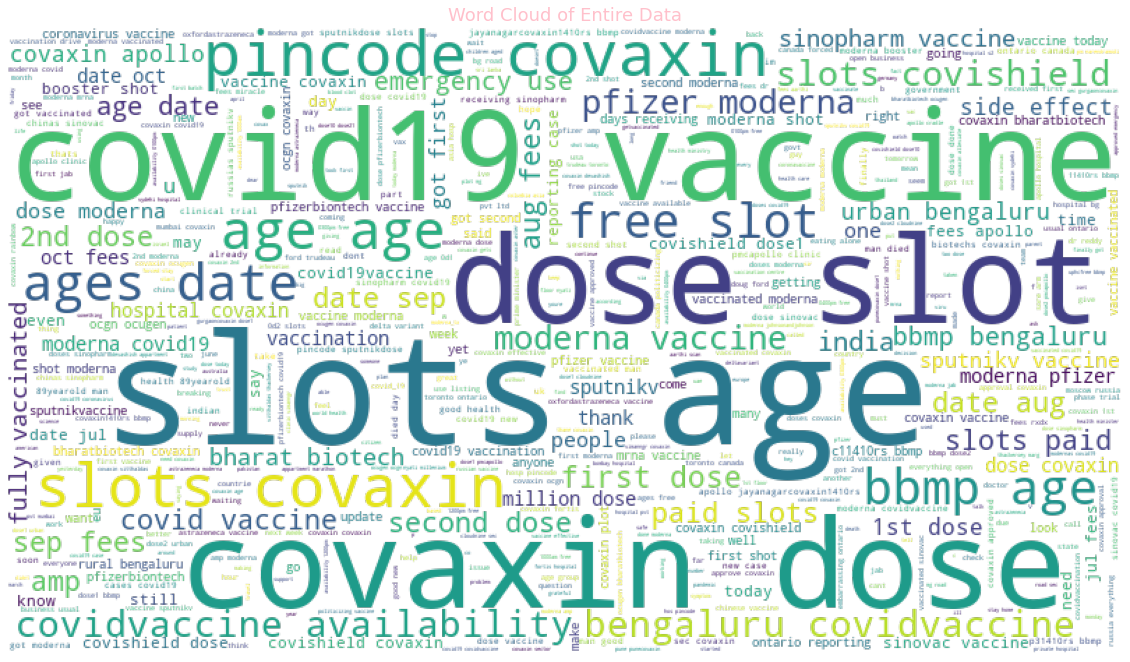

In [ ]:
long_string = ' '.join(list(covid_vaccine_tweet_data_df['Text_stop'].values))
# Create a WordCloud object
wordcloud = WordCloud(mode="RGBA", background_color=None , max_words=1000, height = 450, width = 800, contour_width=3, contour_color='steelblue')
# Generate a word cloud
wordcloud.generate(long_string)
# Visualize the word cloud
wordcloud.to_image()
plt.figure(figsize=(20,15))
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Word Cloud of Entire Data', fontsize=18, color = 'Pink')
plt.show()

In [ ]:
import plotly.express as px
timeline = covid_vaccine_tweet_data_df.groupby(['date']).count().reset_index()
timeline['count'] = timeline['text']
timeline = timeline[['date', 'count']]
fig = px.bar(timeline, x='date', y='count', labels={'date': 'Date', 'count': 'Tweet Count'})
fig.show()

In [ ]:
covid_vaccine_tweet_data_df.head()
covid_vaccine_tweet_data_df.to_csv('Tweets_lem.csv')

In [ ]:
covid_vaccine_tweet_data_df = pd.read_csv('./Tweets_lem.csv')
covid_vaccine_tweet_data_df

,Unnamed: 0,user_name,date,text,Text_stop,Number_Of_Words,Mean_Word_Length,Text_tokenized,Text_lemmatized
0,0,Rachel Roh,2020-12-20,same folks said daikon paste could treatcytoki...,folks said daikon paste could treatcytokine st...,9,6.78,"['folks', 'said', 'daikon', 'paste', 'could', ...","['folk', 'said', 'daikon', 'paste', 'could', '..."
1,1,Albert Fong,2020-12-13,while the world has been on the wrong side of ...,world wrong side history year hopefully bigges...,20,4.65,"['world', 'wrong', 'side', 'history', 'year', ...","['world', 'wrong', 'side', 'history', 'year', ..."
2,2,eli🇱🇹🇪🇺👌,2020-12-12,coronavirus sputnikv astrazeneca pfizerbiontec...,coronavirus sputnikv astrazeneca pfizerbiontec...,14,6.79,"['coronavirus', 'sputnikv', 'astrazeneca', 'pf...","['coronavirus', 'sputnikv', 'astrazeneca', 'pf..."
3,3,Charles Adler,2020-12-12,facts are immutable senator even when youre no...,facts immutable senator even youre ethically s...,19,4.79,"['facts', 'immutable', 'senator', 'even', 'you...","['fact', 'immutable', 'senator', 'even', 'your..."
4,4,Citizen News Channel,2020-12-12,explain to me again why we needvaccine borisjo...,explain needvaccine borisjohnson matthancock w...,11,8.45,"['explain', 'needvaccine', 'borisjohnson', 'ma...","['explain', 'needvaccine', 'borisjohnson', 'ma..."
...,...,...,...,...,...,...,...,...,...
226368,228202,VaxBLR,2021-11-15,45 urban bengaluru covidvaccine availability f...,45 urban bengaluru covidvaccine availability 1...,16,5.56,"['45', 'urban', 'bengaluru', 'covidvaccine', '...","['45', 'urban', 'bengaluru', 'covidvaccine', '..."
226369,228203,VaxBLR,2021-11-15,1844 bbmp bengaluru covidvaccine availability ...,1844 bbmp bengaluru covidvaccine availability ...,14,6.36,"['1844', 'bbmp', 'bengaluru', 'covidvaccine', ...","['1844', 'bbmp', 'bengaluru', 'covidvaccine', ..."
226370,228204,VaxBLR,2021-11-15,1844 urban bengaluru covidvaccine availability...,1844 urban bengaluru covidvaccine availability...,16,5.62,"['1844', 'urban', 'bengaluru', 'covidvaccine',...","['1844', 'urban', 'bengaluru', 'covidvaccine',..."
226371,228205,Gatti Valentino🐾,2021-11-15,they promote their vaccines leaving out the st...,promote vaccines leaving stronger russia vacci...,11,6.00,"['promote', 'vaccines', 'leaving', 'stronger',...","['promote', 'vaccine', 'leaving', 'stronger', ..."


# Sentiment Analysis

Alloting Positive, Negative, Neutral categories to the above lemmatised data

In [ ]:
!pip install vaderSentiment
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

analyser = SentimentIntensityAnalyzer()
scores=[]
for i in range(len(covid_vaccine_tweet_data_df['Text_lemmatized'])):
  
    score = analyser.polarity_scores(str(covid_vaccine_tweet_data_df['Text_lemmatized'][i]))
    score=score['compound']
    scores.append(score)


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 282.7 kB/s eta 0:00:00a 0:00:01


In [ ]:
sentiment=[]
for i in scores:
    if i>=0.05:
        sentiment.append('Positive')
    elif i<=(-0.05):
        sentiment.append('Negative')
    else:
        sentiment.append('Neutral')
covid_vaccine_tweet_data_df['Sentiments']= pd.Series(np.array(sentiment))

Check the number of Postive, Negative, Neutral texts in the dataset

In [ ]:
counts_df = covid_vaccine_tweet_data_df.Sentiments.value_counts().reset_index()
counts_df

,index,Sentiments
0,Neutral,113697
1,Positive,79787
2,Negative,32889


<AxesSubplot:xlabel='index', ylabel='Sentiments'>

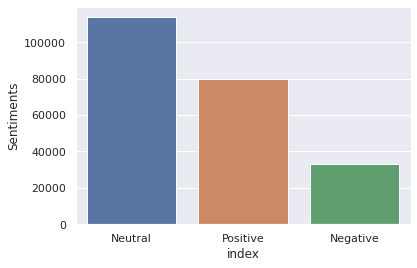

In [ ]:
sns.barplot(data=counts_df, x='index', y='Sentiments')

In [ ]:
data_agg = covid_vaccine_tweet_data_df[[ 'user_name', 'date', 'Sentiments']].groupby(['date', 'Sentiments']).count().reset_index()
data_agg.columns = ['date', 'Sentiments', 'counts']
data_agg.head()

,date,Sentiments,counts
0,2020-12-12,Negative,10
1,2020-12-12,Neutral,26
2,2020-12-12,Positive,27
3,2020-12-13,Negative,15
4,2020-12-13,Neutral,49


In [ ]:
px.line(data_agg, x='date', y='counts', color='Sentiments', title='COVID-19 Vaccines Sentiment Analysis')

# Data Modeling

#### Separating 80% data for training data and 20% for testing data using Train Test Split

In [ ]:
X = covid_vaccine_tweet_data_df["Text_stop"]
y = covid_vaccine_tweet_data_df["Sentiments"]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.20)

### Performing TF-IDF Conversion

TF-IDF stands for term frequency-inverse document frequency and it is a measure used in the fields of information retrieval (IR) and machine learning, that can quantify the importance or relevance of string representations.

Tf-Idf is one of the vectorization techniques which is used to convert the input data from its raw format in numeric form to support the ML Models

In [ ]:
vectoriser = TfidfVectorizer(ngram_range=(1,2), max_features=500000)
vectoriser.fit((X_train).values.astype('U'))
print('No. of feature_words: ', len(vectoriser.get_feature_names()))

/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.



No. of feature_words:  500000


In [ ]:
X_train = vectoriser.transform((X_train).values.astype('U'))
X_test  = vectoriser.transform((X_test).values.astype('U'))

# Model Evaluation Function

This function will be called for each Machine learning algorithm to print classification report and confusion matrix.

In [ ]:
def model_evaluate(model,X_test):
    y_pred = model.predict(X_test)
    print(classification_report(y_test, y_pred))
    cf_matrix = confusion_matrix(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)

    cm_df = pd.DataFrame(cm,
                     index = ['Negative','Positive','Neutral'], 
                     columns = ['Negative','Positive','Neutral'])

    #Plotting the confusion matrix
    plt.figure(figsize=(5,4))
    sns.heatmap(cm_df, annot=True, cmap="Oranges",linecolor="gray")
    plt.title('Confusion Matrix')
    plt.ylabel('Actual Values')
    plt.xlabel('Predicted Values')
    plt.show()

# 1. Logistic Regression Model

In [ ]:
lr_model = LogisticRegression(C = 1, max_iter = 1000, penalty = 'l2', n_jobs=-1)
lr_model.fit(X_train  ,y_train)

LogisticRegression(C=1, max_iter=1000, n_jobs=-1)

              precision    recall  f1-score   support

    Negative       0.92      0.71      0.80      6584
     Neutral       0.90      0.98      0.94     22817
    Positive       0.94      0.91      0.93     15874

    accuracy                           0.92     45275
   macro avg       0.92      0.87      0.89     45275
weighted avg       0.92      0.92      0.92     45275



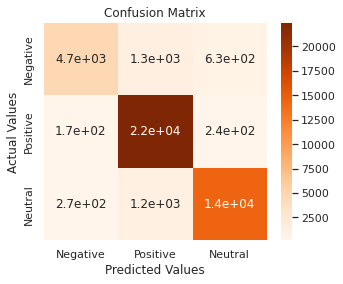

In [ ]:
model_evaluate(lr_model ,X_test)

 **Accuracy for logistic regression obtained: 92%**

# Hyperparameter Tuning

In [ ]:
from sklearn.model_selection import GridSearchCV                               
from sklearn.model_selection import RepeatedStratifiedKFold

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
space = dict()
space['solver'] = ['newton-cg', 'lbfgs', 'liblinear']
space['penalty'] = ['none', 'l1', 'l2', 'elasticnet']
space['C'] = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 10, 100]





In [ ]:
grid_search = GridSearchCV(lr_model, space, scoring='accuracy', n_jobs=-1, cv=3)
grid_result = grid_search.fit(X_train,y_train)



/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1526: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  " = {}.".format(effective_n_jobs(self.n_jobs))
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1526: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  " = {}.".format(effective_n_jobs(self.n_jobs))
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1526: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  " = {}.".format(effective_n_jobs(self.n_jobs))
/opt/conda/lib/python3.7/site-packages/joblib/externals/loky/process_exe

In [ ]:
print('Best Score: %s' % grid_result.best_score_)
print('Best Hyperparameters: %s' % grid_result.best_params_)

Best Score: 0.9681387977779986
Best Hyperparameters: {'C': 100, 'penalty': 'l1', 'solver': 'liblinear'}


## Logistic Regression Model after Hyperparameter Tuning

Finding the accuracy of the Logistic regression model using best hyperparameters

In [ ]:
lrm = LogisticRegression(C = 100, penalty = 'l1', solver = 'liblinear')

lrm.fit(X_train, y_train)


LogisticRegression(C=100, penalty='l1', solver='liblinear')

              precision    recall  f1-score   support

    Negative       0.95      0.93      0.94      6584
     Neutral       0.99      0.99      0.99     22817
    Positive       0.97      0.98      0.97     15874

    accuracy                           0.98     45275
   macro avg       0.97      0.96      0.97     45275
weighted avg       0.98      0.98      0.98     45275



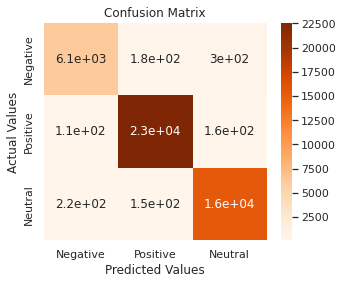

In [ ]:
model_evaluate(lrm ,X_test)

The accuracy of Logistic Regression Model has been increased to **98%** after using hyperparameters.

# 2. Decision Tree Model


In [ ]:
from sklearn.tree import DecisionTreeClassifier 

dtmodel = DecisionTreeClassifier()
dtc = dtmodel.fit(X_train,y_train)


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1526: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  " = {}.".format(effective_n_jobs(self.n_jobs))
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"


              precision    recall  f1-score   support

    Negative       0.85      0.74      0.79      6584
     Neutral       0.91      0.97      0.94     22817
    Positive       0.92      0.89      0.91     15874

    accuracy                           0.91     45275
   macro avg       0.89      0.87      0.88     45275
weighted avg       0.91      0.91      0.91     45275



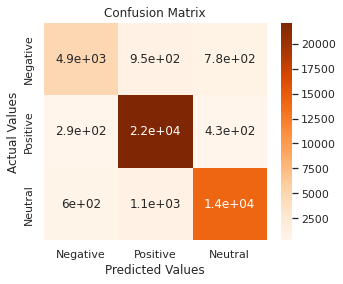

In [ ]:
model_evaluate(dtc ,X_test)

Accuracy of Decision tree base model is **91%**

## Hyperparameter Tuning of Decision Tree using Random Search CV

In [ ]:
from scipy.stats import randint
from sklearn.model_selection import RandomizedSearchCV

# Setup the parameters and distributions to sample from: param_dist
param_dist = {"max_depth": [3, None],
              "max_features": randint(1, 9),
              "min_samples_leaf": randint(1, 9),
              "criterion": ["gini", "entropy"]}

tree_cv = RandomizedSearchCV(dtmodel, param_dist, cv=2)

# Fit it to the data
tree_cv.fit(X_train,y_train)

# Print the tuned parameters and score
print("Tuned Decision Tree Parameters: {}".format(tree_cv.best_params_))
print("Best score is {}".format(tree_cv.best_score_))

Tuned Decision Tree Parameters: {'criterion': 'gini', 'max_depth': None, 'max_features': 4, 'min_samples_leaf': 1}
Best score is 0.6775557985179295


## Decision Tree Model with Hyperparameter Tuning-Random Search CV

/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



              precision    recall  f1-score   support

    Negative       0.00      0.00      0.00      6584
     Neutral       0.50      1.00      0.67     22817
    Positive       0.75      0.00      0.00     15874

    accuracy                           0.50     45275
   macro avg       0.42      0.33      0.22     45275
weighted avg       0.52      0.50      0.34     45275



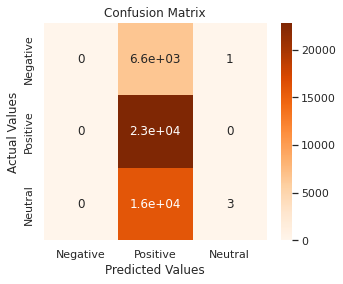

In [ ]:
dtmodel_cv = DecisionTreeClassifier(criterion = 'entropy', max_depth = 3, max_features = 8, min_samples_leaf = 3)
dtmodel_cv.fit(X_train,y_train)

model_evaluate(dtmodel_cv ,X_test)

## Hyperparameter Tuning of Decision Tree using Grid Search CV

In [ ]:
param = {"criterion":['gini','entropy'],"max_depth":[4,8]}

grid = GridSearchCV(dtmodel, param_grid= param,cv=2,verbose=1,n_jobs=-1)

grid.fit(X_train, y_train)

# Print the tuned parameters and score

print("Tuned Decision Tree Parameters: {}".format(grid.best_params_))

print("Best score is {}".format(grid.best_score_))

Fitting 2 folds for each of 4 candidates, totalling 8 fits
Tuned Decision Tree Parameters: {'criterion': 'entropy', 'max_depth': 8}
Best score is 0.6354846547173354


## Decision Tree with Grid Search Hyperparameter Tuning

              precision    recall  f1-score   support

    Negative       0.95      0.04      0.08      6584
     Neutral       0.59      1.00      0.74     22817
    Positive       0.95      0.37      0.53     15874

    accuracy                           0.64     45275
   macro avg       0.83      0.47      0.45     45275
weighted avg       0.77      0.64      0.57     45275



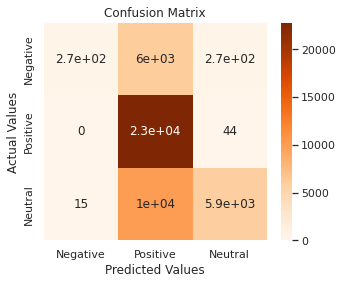

In [ ]:
dtmodel_gcv = DecisionTreeClassifier(criterion = 'entropy', max_depth = 8)
dtmodel_gcv.fit(X_train,y_train)

model_evaluate(dtmodel_gcv ,X_test)

Using hyperparameter tuning on Decision Tree did not have any positive effect as the decline in accuracy can be observed.

# 3. K-Neighbors Classifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train  ,y_train)

KNeighborsClassifier(n_neighbors=3)

              precision    recall  f1-score   support

    Negative       0.95      0.21      0.35      6661
     Neutral       0.57      0.99      0.72     22696
    Positive       0.97      0.26      0.41     15918

    accuracy                           0.62     45275
   macro avg       0.83      0.49      0.49     45275
weighted avg       0.77      0.62      0.56     45275



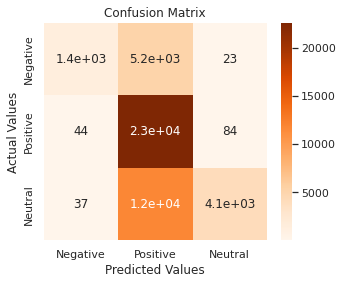

In [ ]:
model_evaluate(neigh ,X_test)

The accuracy of the K-Neighbors Classifier model **62%**

# KNN Classifier Hyperparameter Tuning

In [ ]:
from sklearn.model_selection import GridSearchCV 
grid_params = { 'n_neighbors' : [4,8],
               'weights' : ['uniform','distance'],
               'metric' : ['minkowski']}

gs = GridSearchCV(KNeighborsClassifier(), grid_params, verbose = 1, cv=2, n_jobs = -1)

In [ ]:
g_res = gs.fit(X_train, y_train)

Fitting 2 folds for each of 4 candidates, totalling 8 fits


In [ ]:
g_res.best_score_
g_res.best_params_

{'metric': 'minkowski', 'n_neighbors': 8, 'weights': 'distance'}

# KNN Classifier with Hyperparameter Tuning

In [ ]:
neigh_t = KNeighborsClassifier(n_neighbors=8, weights= 'distance', metric= 'minkowski')
neigh_t.fit(X_train  ,y_train)

KNeighborsClassifier(n_neighbors=8, weights='distance')

              precision    recall  f1-score   support

    Negative       0.98      0.20      0.33      6661
     Neutral       0.57      1.00      0.72     22696
    Positive       0.99      0.25      0.40     15918

    accuracy                           0.62     45275
   macro avg       0.84      0.48      0.48     45275
weighted avg       0.78      0.62      0.55     45275



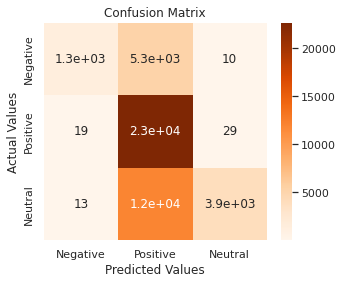

In [ ]:
model_evaluate(neigh_t ,X_test)

There is no change in accuracy of the model after hyperparameter tuning

# 4. Random Forest Classifier

In [ ]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
rfc=RandomForestClassifier(n_estimators=10)

#Train the model using the training sets y_pred=clf.predict(X_test)
rfc.fit(X_train,y_train)

RandomForestClassifier(n_estimators=10)

              precision    recall  f1-score   support

    Negative       0.89      0.63      0.74      6584
     Neutral       0.84      0.98      0.90     22817
    Positive       0.92      0.81      0.86     15874

    accuracy                           0.87     45275
   macro avg       0.88      0.81      0.83     45275
weighted avg       0.88      0.87      0.86     45275



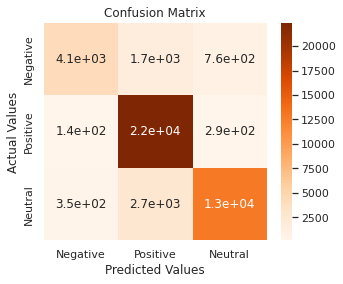

In [ ]:
model_evaluate(rfc ,X_test)

The accuracy obtained for Random Forest Classifier is **87%**

# Random forest classifier - Hyperparameter Tuning (Random Search CV)

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [25,140]
max_features = ['auto', 'sqrt']
max_depth = [10,450]
min_samples_split = [1,140]
# Minimum number of samples required at each leaf node
min_samples_leaf = [6,8]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
              'criterion':['entropy','gini']}
print(random_grid)

{'n_estimators': [25, 140], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 450], 'min_samples_split': [1, 140], 'min_samples_leaf': [6, 8], 'criterion': ['entropy', 'gini']}


In [ ]:
rf_randomcv=RandomizedSearchCV(estimator=rfc,param_distributions=random_grid,n_iter=6,cv=3,verbose=2,
                               random_state=100,n_jobs=-1)
### fit the randomized model
rf_randomcv.fit(X_train,y_train)

Fitting 3 folds for each of 6 candidates, totalling 18 fits
[CV] END criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=6, min_samples_split=1, n_estimators=140; total time=   0.8s
[CV] END criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=6, min_samples_split=1, n_estimators=25; total time=   0.7s
[CV] END criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=8, min_samples_split=1, n_estimators=25; total time=   0.7s
[CV] END criterion=gini, max_depth=450, max_features=sqrt, min_samples_leaf=6, min_samples_split=1, n_estimators=25; total time=   0.7s
[CV] END criterion=gini, max_depth=450, max_features=sqrt, min_samples_leaf=6, min_samples_split=1, n_estimators=25; total time=   0.7s
[CV] END criterion=gini, max_depth=450, max_features=sqrt, min_samples_leaf=6, min_samples_split=1, n_estimators=25; total time=   0.7s
[CV] END criterion=entropy, max_depth=450, max_features=sqrt, min_samples_leaf=6, min_samples_split=1, n_estimators=140; to

/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning:


15 fits failed out of a total of 18.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py", line 467, in fit
    for i, t in enumerate(trees)
  File "/opt/conda/lib/python3.7/site-packages/joblib/parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "/opt/conda/lib/python3.7/site-packages/joblib/par

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(n_estimators=10),
                   n_iter=6, n_jobs=-1,
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': [10, 450],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [6, 8],
                                        'min_samples_split': [1, 140],
                                        'n_estimators': [25, 140]},
                   random_state=100, verbose=2)

In [ ]:
rf_randomcv.best_params_
best_random_grid=rf_randomcv.best_estimator_

# Random Forest with Hyperparameter Tuning

In [ ]:

from sklearn.metrics import accuracy_score
y_pred=best_random_grid.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print("Accuracy Score {}".format(accuracy_score(y_test,y_pred)))
print("Classification report: {}".format(classification_report(y_test,y_pred)))

[[ 2431  3211   942]
 [   75 22482   260]
 [  115  3845 11914]]
Accuracy Score 0.8134069574820542
Classification report:               precision    recall  f1-score   support

    Negative       0.93      0.37      0.53      6584
     Neutral       0.76      0.99      0.86     22817
    Positive       0.91      0.75      0.82     15874

    accuracy                           0.81     45275
   macro avg       0.87      0.70      0.74     45275
weighted avg       0.84      0.81      0.80     45275

[CV] END criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=6, min_samples_split=1, n_estimators=140; total time=   0.8s
[CV] END criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=8, min_samples_split=1, n_estimators=25; total time=   0.7s
[CV] END criterion=gini, max_depth=450, max_features=auto, min_samples_leaf=8, min_samples_split=140, n_estimators=140; total time=44.0min
[CV] END criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=6, min_sam

The Accuracy for Random Forest Classifier after tuning is **81%**

# 5.LinearSVC Model

In [ ]:
from sklearn.svm import LinearSVC

lsvc = LinearSVC(verbose=0)
print(lsvc)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

LinearSVC()


LinearSVC()

In [ ]:
lsvc.fit(X_train  ,y_train)

LinearSVC()

              precision    recall  f1-score   support

    Negative       0.93      0.84      0.88      6661
     Neutral       0.96      0.99      0.97     22696
    Positive       0.96      0.95      0.95     15918

    accuracy                           0.95     45275
   macro avg       0.95      0.93      0.94     45275
weighted avg       0.95      0.95      0.95     45275



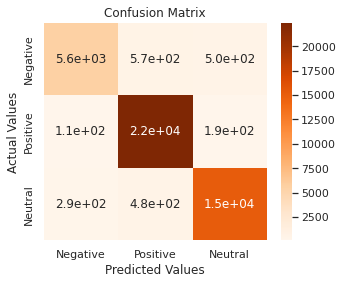

In [ ]:
model_evaluate(lsvc ,X_test)

Accuracy for LinearSVC model is **95%**

# 6. AdaBoostClassifier

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
clf = AdaBoostClassifier(n_estimators=100, random_state=0)
clf.fit(X_train  ,y_train)

AdaBoostClassifier(n_estimators=100, random_state=0)

              precision    recall  f1-score   support

    Negative       0.83      0.38      0.52      6661
     Neutral       0.74      0.98      0.84     22696
    Positive       0.93      0.70      0.80     15918

    accuracy                           0.79     45275
   macro avg       0.83      0.69      0.72     45275
weighted avg       0.82      0.79      0.78     45275



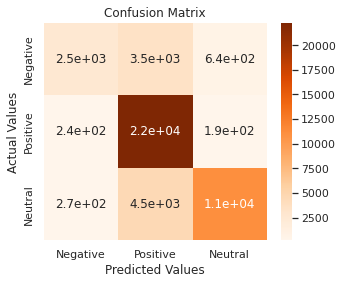

In [ ]:
model_evaluate(clf ,X_test)

Accuracy for AdaBoost Classifier is **79%**

# RESULTS AND CONCLUSION


Logistic Regression gave an accuracy of	92%, and after hyperparameter tuning 98%

Decision Tree Model	gave an accuracy of 91%,and after hyperparameter tuning	64% (grid search), 50% (random search)

K-Neighbors Classifier's accuracy before and after hyperparameter tuning remained the same i.e,	64%	

Random Forest Classifier 	gave an accuracy of	87%, and after hyperparameter tuning 81%

Model	Accuracy of

Linear SVC was	95%

AdaBoost Classifier	was 79%

After a comparative study on the models above, we come to a conclusion that the classification model using **the Logistic regression algorithm is the best model with an accuracy score of 98% after hyperparameter tuning.**


# **References**

1. https://www.analyticsvidhya.com/blog/2021/05/how-to-build-word-cloud-in-python/

2. https://towardsdatascience.com/logistic-regression-detailed-overview-46c4da4303bc

3. https://analyticsindiamag.com/hands-on-implementation-of-tf-idf-from-scratch-in-python/

4. https://towardsdatascience.com/a-beginners-guide-to-sentiment-analysis-in-python-95e354ea84f6

5. https://towardsdatascience.com/hyperparameter-tuning-in-python-21a76794a1f7

6. https://www.kaggle.com/code/arunimsamudra/k-nn-with-hyperparameter-tuning/notebook

LICENSE

Copyright (c) 2022 

Prathamesh Rege

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software. italicized text

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.